## Submission By Ankit Singh 
## 2201AI47

## Importing Libraries

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
# Importing Metrics for Evaluation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, RocCurveDisplay, f1_score , accuracy_score ,precision_score , recall_score

In [3]:
# Importing the data 

df = pd.read_csv("heart.csv")
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
# Checking the number of rows and columns
df.shape

(303, 14)

In [5]:
X = df.drop("output",axis=1)
y = df["output"]
print(X.shape)
y.shape

(303, 13)


(303,)

In [6]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

#### Splitting the dataSet 

In [8]:
from sklearn.model_selection import train_test_split
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X,y,test_size = 0.3,random_state=42)

In [9]:
print(X_train_80.shape)
print(X_train_70.shape)
print(X_test_20.shape)
print(X_test_30.shape)
print(y_train_80.shape)
print(y_train_70.shape)
print(y_test_20.shape)
print(y_test_30.shape)

(242, 13)
(212, 13)
(61, 13)
(91, 13)
(242,)
(212,)
(61,)
(91,)


## Scaling the data 


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaled_X_train_80= scaler.fit_transform(X_train_80)

In [12]:
scaled_X_train_70= scaler.fit_transform(X_train_70)

In [13]:
scaled_X_test_20 = scaler.transform(X_test_20)

In [14]:
scaled_X_test_30 = scaler.transform(X_test_30)

## Defining Functions that are used --



### Function to print Confusion Matrix 

In [15]:
## Function to print Confusion matrix 

import seaborn as sns

def print_confusion_matrix(test, preds):
    cm = confusion_matrix(test, preds)
    print("Confusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("\nClassification Report:")
    print(classification_report(test, preds))


### Function to draw ROC-AUC Curve

In [16]:
def auc_curve_printing(test, pred):

    fpr, tpr, thresholds = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    print("ROC AUC Score:", roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

### Function for Ablation Study

In [17]:
def ablation_study(classifier , X_train_80 , X_test_20 , y_train_80 , y_test_20 ):
    # Ablation Study For LDA 

    columns = [ str(feature) for feature in X_train_80.columns]
    dict ={}
    max_accuracy =0 

    for col in columns :
        ab_X_train = X_train_80[col].values.reshape((-1,1))
        ab_X_test = X_test_20[col].values.reshape((-1,1))
        
        classifier.fit(ab_X_train, y_train_80)

        y_pred = classifier.predict(ab_X_test)
         
        print(col," : ", accuracy_score(y_test_20,y_pred=y_pred))
        dict[col] = accuracy_score(y_test_20,y_pred=y_pred)

        
    print("\nColumn With highest Accuracy is " ,max(dict, key=dict.get))


### Storing the Model Performance Measures in Dictionaries

In [18]:
## Dictionary Storing F1-score of each classifier

F1Scores={}
Recall_Of_Model={}
Accuracy_Of_Model={}
Precision_Of_Model={}


# Training Models

## Logistic Regression

#### 80 - 20 Split

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg_classifier = LogisticRegression(random_state=0)
logreg_classifier.fit(scaled_X_train_80, y_train_80)

LogisticRegression(random_state=0)

#### Predicting the test results

In [21]:
y_pred = logreg_classifier.predict(scaled_X_test_20)

Confusion Matrix:


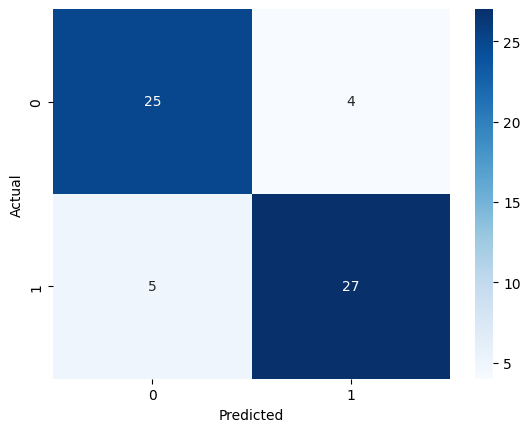


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [22]:

print_confusion_matrix(y_test_20, y_pred) 

# Storing the results in the dictionaries made above
classifiername ="Logistic_Regression"
F1Scores[classifiername]= f1_score(y_test_20, y_pred , average='weighted')
Recall_Of_Model[classifiername]=recall_score(y_test_20, y_pred)
Accuracy_Of_Model[classifiername]=accuracy_score(y_test_20, y_pred)
Precision_Of_Model[classifiername]=precision_score(y_test_20, y_pred)


ROC AUC Score: 0.8529094827586207


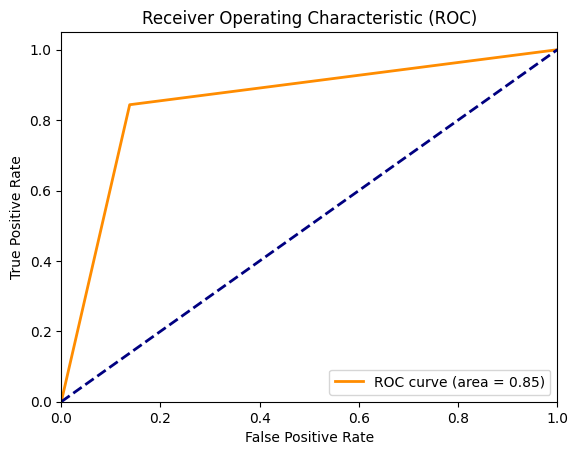

In [23]:
# Print the Curve
auc_curve_printing(y_test_20, y_pred)

#### Ablation Study for Logistic Regression

In [24]:
ablation_study(LogisticRegression(random_state=0)  , X_train_80 , X_test_20 , y_train_80 , y_test_20)

age  :  0.5573770491803278
sex  :  0.5573770491803278
cp  :  0.8360655737704918
trtbps  :  0.5901639344262295
chol  :  0.5409836065573771
fbs  :  0.5245901639344263
restecg  :  0.5245901639344263
thalachh  :  0.7213114754098361
exng  :  0.7049180327868853
oldpeak  :  0.6885245901639344
slp  :  0.7213114754098361
caa  :  0.7213114754098361
thall  :  0.7868852459016393

Column With highest Accuracy is  cp


#### 70 - 30 Split 

In [25]:
logreg_classifier = LogisticRegression(random_state=0)
logreg_classifier.fit(scaled_X_train_70, y_train_70)

LogisticRegression(random_state=0)

#### Predicting the test results

In [26]:
preds = (logreg_classifier.predict_proba(scaled_X_test_30)[:, 1] >= 0.6).astype(int)

Confusion Matrix:


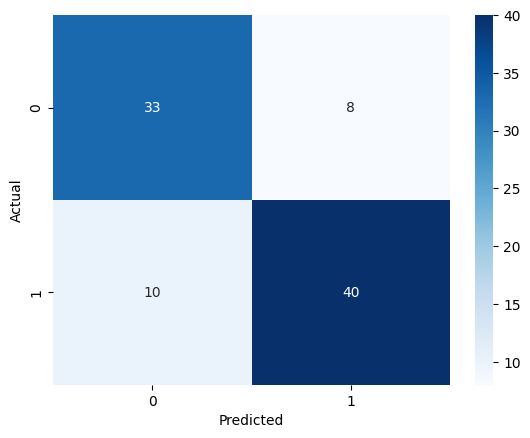


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [27]:

print_confusion_matrix(y_test_30 , preds)

# print("Confusion Matrix:")
# print(confusion_matrix(y_test_30, preds))
# print("\nClassification Report:")
# print(classification_report(y_test_30, preds))

ROC AUC Score: 0.802439024390244


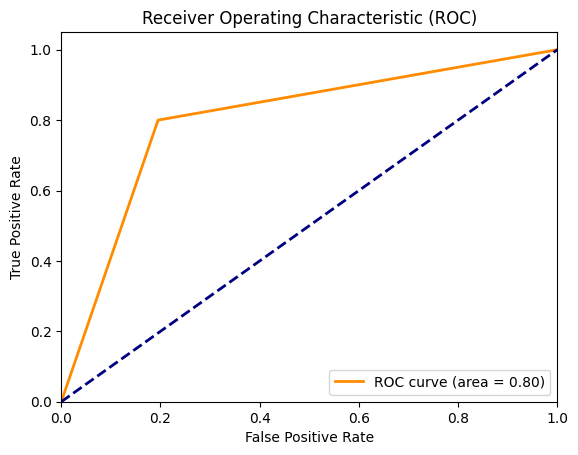

In [28]:
auc_curve_printing(y_test_30, preds)

In [29]:

ablation_study(LogisticRegression(random_state=0) , X_train_80 , X_test_20 , y_train_80 , y_test_20 )



age  :  0.5573770491803278
sex  :  0.5573770491803278
cp  :  0.8360655737704918
trtbps  :  0.5901639344262295
chol  :  0.5409836065573771
fbs  :  0.5245901639344263
restecg  :  0.5245901639344263
thalachh  :  0.7213114754098361
exng  :  0.7049180327868853
oldpeak  :  0.6885245901639344
slp  :  0.7213114754098361
caa  :  0.7213114754098361
thall  :  0.7868852459016393

Column With highest Accuracy is  cp


## KNN


#### 80 -20 Split

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(scaled_X_train_80, y_train_80)

KNeighborsClassifier()

#### Predicting the test results

In [32]:
y_pred = knn_classifier.predict(scaled_X_test_20)

Confusion Matrix:


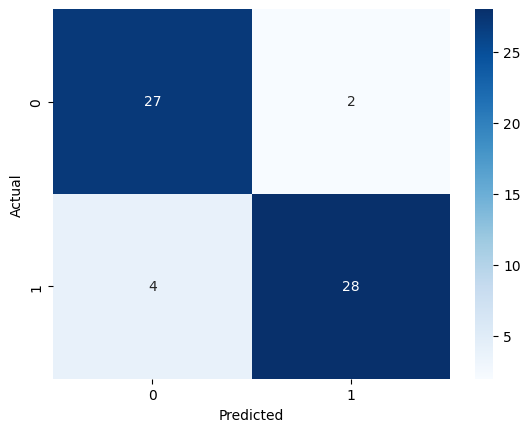


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [33]:
print_confusion_matrix(y_test_20, y_pred) 
classifiername ="KNN_Classifier"
F1Scores[classifiername]= f1_score(y_test_20, y_pred , average='weighted')
Recall_Of_Model[classifiername]=recall_score(y_test_20, y_pred)
Accuracy_Of_Model[classifiername]=accuracy_score(y_test_20, y_pred)
Precision_Of_Model[classifiername]=precision_score(y_test_20, y_pred)

ROC AUC Score: 0.9030172413793103


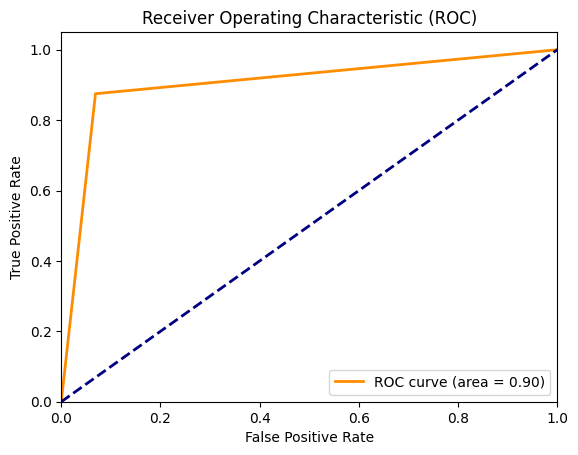

In [34]:

auc_curve_printing(y_test_20, y_pred)

#### Ablation Study for KNN

In [35]:
ablation_study(KNeighborsClassifier(n_neighbors=5) , X_train_80 , X_test_20 , y_train_80 , y_test_20 )


age  :  0.5245901639344263
sex  :  0.5573770491803278
cp  :  0.6557377049180327
trtbps  :  0.45901639344262296
chol  :  0.6229508196721312
fbs  :  0.5573770491803278
restecg  :  0.6721311475409836
thalachh  :  0.7213114754098361
exng  :  0.7049180327868853
oldpeak  :  0.7377049180327869
slp  :  0.7213114754098361
caa  :  0.7213114754098361
thall  :  0.8032786885245902

Column With highest Accuracy is  thall


#### 70 - 30 Split  

In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(scaled_X_train_70, y_train_70)

KNeighborsClassifier()

### Predicting the test results

In [37]:
y_pred = knn_classifier.predict(scaled_X_test_30)

Confusion Matrix:


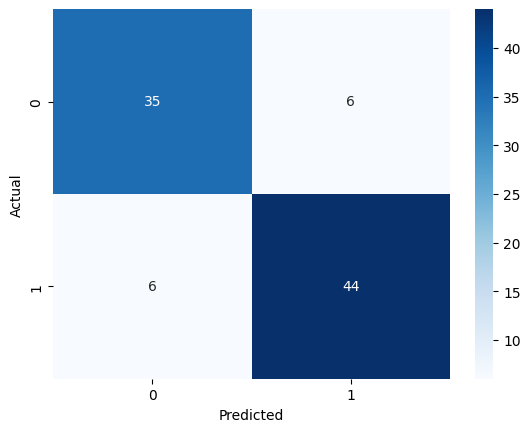


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [38]:
print_confusion_matrix(y_test_30, y_pred) 

ROC AUC Score: 0.8668292682926828


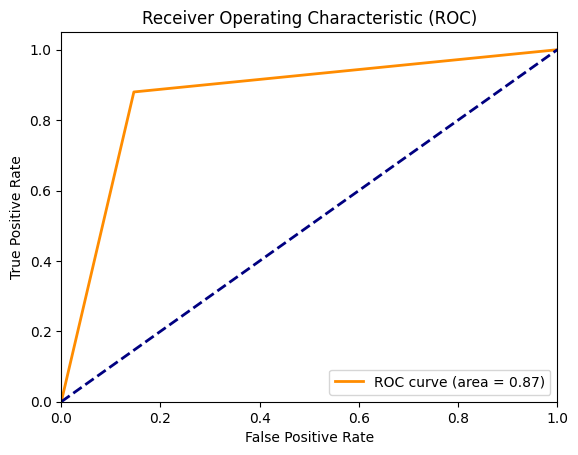

In [39]:
auc_curve_printing(y_test_30, y_pred)

## LDA Classifier

#### 80 - 20 Split 

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [41]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(scaled_X_train_80, y_train_80)

LinearDiscriminantAnalysis()

#### Predicting the test results

In [42]:
y_pred = lda_classifier.predict(scaled_X_test_20)

Confusion Matrix:


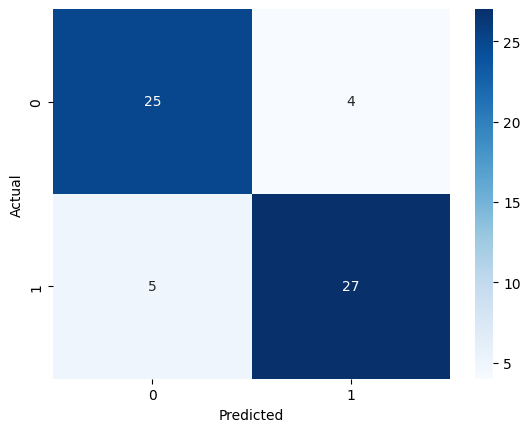


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [43]:
print_confusion_matrix(y_test_20, y_pred)
classifiername ="LDA_Classifier"
F1Scores[classifiername]= f1_score(y_test_20, y_pred , average='weighted')
Recall_Of_Model[classifiername]=recall_score(y_test_20, y_pred)
Accuracy_Of_Model[classifiername]=accuracy_score(y_test_20, y_pred)
Precision_Of_Model[classifiername]=precision_score(y_test_20, y_pred)

ROC AUC Score: 0.8529094827586207


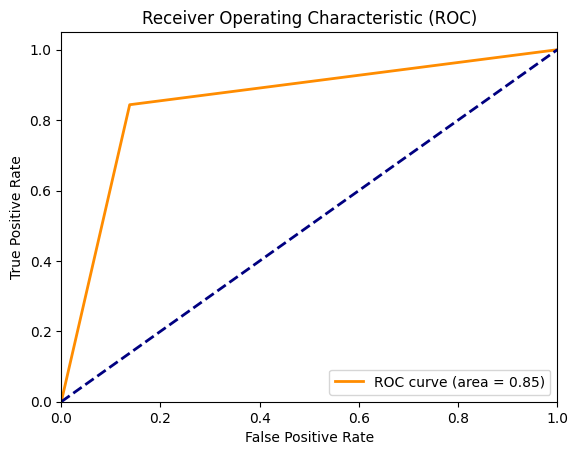

In [44]:
auc_curve_printing(y_test_20, y_pred)

#### Ablation Study for LDA

In [45]:
ablation_study( LinearDiscriminantAnalysis() , X_train_80 , X_test_20 , y_train_80 , y_test_20 )


age  :  0.5573770491803278
sex  :  0.5573770491803278
cp  :  0.8360655737704918
trtbps  :  0.5901639344262295
chol  :  0.5409836065573771
fbs  :  0.5245901639344263
restecg  :  0.5245901639344263
thalachh  :  0.7213114754098361
exng  :  0.7049180327868853
oldpeak  :  0.6885245901639344
slp  :  0.7213114754098361
caa  :  0.7213114754098361
thall  :  0.7868852459016393

Column With highest Accuracy is  cp


#### 70 - 30 Split

In [46]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(scaled_X_train_70, y_train_70)

LinearDiscriminantAnalysis()

### Predicting the test results

In [47]:
y_pred = lda_classifier.predict(scaled_X_test_30)

Confusion Matrix:


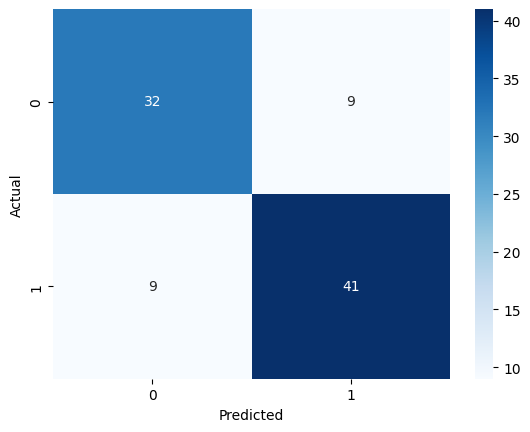


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        41
           1       0.82      0.82      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [48]:
print_confusion_matrix(y_test_30, y_pred) 

ROC AUC Score: 0.8002439024390243


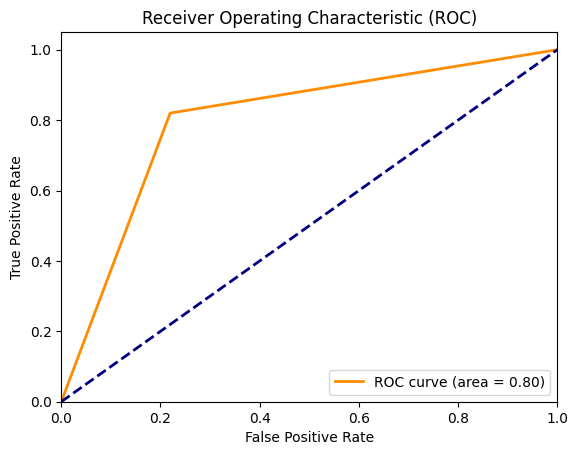

In [49]:
auc_curve_printing(y_test_30, y_pred)

## Naive Bayes



#### 80 - 20 Split

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(scaled_X_train_80, y_train_80)

GaussianNB()

#### Predicting the results

In [52]:
y_pred = naive_bayes_classifier.predict(scaled_X_test_20)

Confusion Matrix:


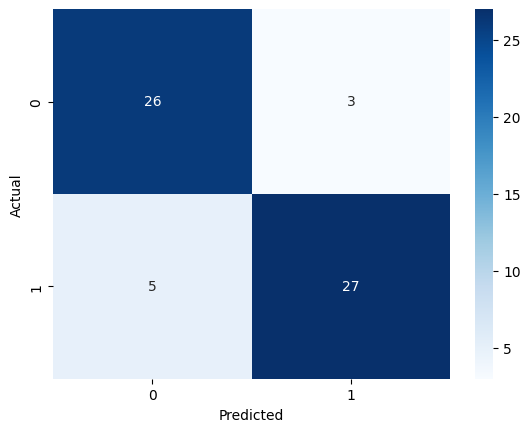


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [53]:
print_confusion_matrix(y_test_20 , y_pred)
classifiername ="Naive_Bayes_Classifier"
F1Scores[classifiername]= f1_score(y_test_20, y_pred , average='weighted')
Recall_Of_Model[classifiername]=recall_score(y_test_20, y_pred)
Accuracy_Of_Model[classifiername]=accuracy_score(y_test_20, y_pred)
Precision_Of_Model[classifiername]=precision_score(y_test_20, y_pred)

ROC AUC Score: 0.8701508620689655


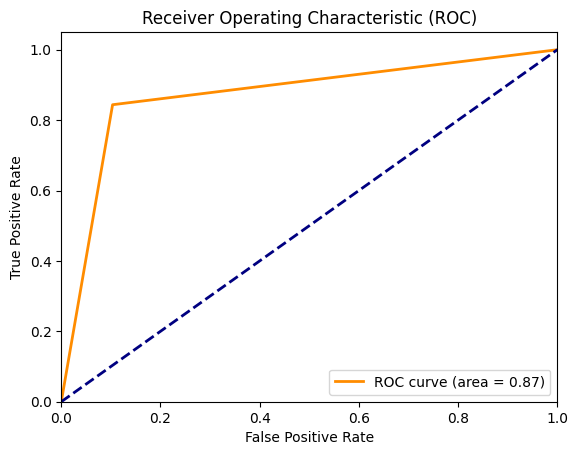

In [54]:
auc_curve_printing(y_test_20 , y_pred)

#### Ablation Study for Naive Bayes

In [55]:
ablation_study(GaussianNB(), X_train_80 , X_test_20 , y_train_80 , y_test_20 )


age  :  0.6229508196721312
sex  :  0.5573770491803278
cp  :  0.8360655737704918
trtbps  :  0.5901639344262295
chol  :  0.5245901639344263
fbs  :  0.5245901639344263
restecg  :  0.5245901639344263
thalachh  :  0.6885245901639344
exng  :  0.7049180327868853
oldpeak  :  0.6721311475409836
slp  :  0.7213114754098361
caa  :  0.7213114754098361
thall  :  0.8032786885245902

Column With highest Accuracy is  cp


#### 70 - 30 Split

In [56]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(scaled_X_train_70, y_train_70)

GaussianNB()

#### Predicting the results

In [57]:
preds = (naive_bayes_classifier.predict_proba(scaled_X_test_30)[:, 1] >= 0.6).astype(int)

Confusion Matrix:


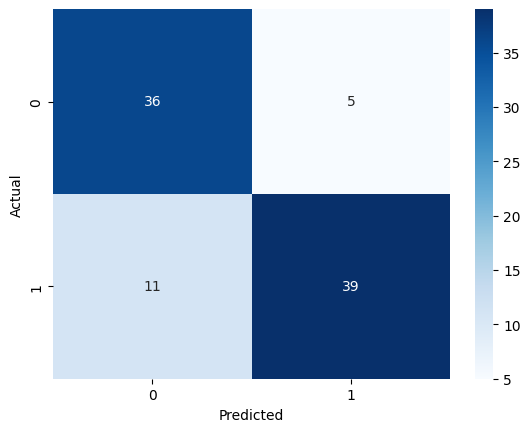


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.89      0.78      0.83        50

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



In [58]:
print_confusion_matrix(y_test_30 , preds)

ROC AUC Score: 0.8290243902439025


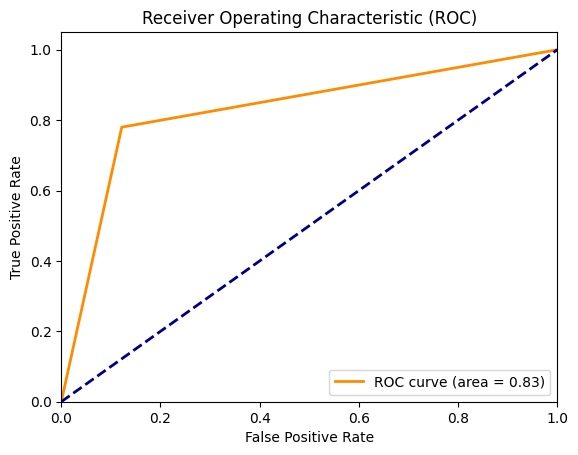

In [59]:
auc_curve_printing(y_test_30 , preds)

## SVM ( Support Vector Machine )

#### 80 - 20 Split 

In [60]:
from sklearn.svm import SVC

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf','sigmoid']}
#dict of various parameter we are gonna test and their values to test
grid = GridSearchCV(svm,param_grid)

In [63]:
grid.fit(scaled_X_train_80,y_train_80)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [64]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [65]:
svm_classifier = SVC(kernel='rbf',C=1, random_state=0)
svm_classifier.fit(scaled_X_train_80, y_train_80)

SVC(C=1, random_state=0)

#### Predicting the results

In [66]:
y_pred = svm_classifier.predict(scaled_X_test_20)

Confusion Matrix:


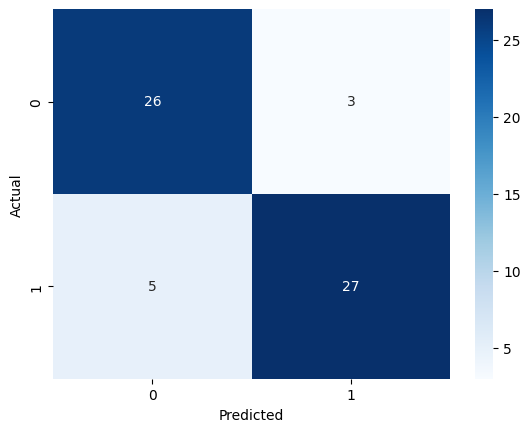


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [67]:
print_confusion_matrix(y_test_20, y_pred)
classifiername ="SVM_Classifier"
F1Scores[classifiername]= f1_score(y_test_20, y_pred , average='weighted')
Recall_Of_Model[classifiername]=recall_score(y_test_20, y_pred)
Accuracy_Of_Model[classifiername]=accuracy_score(y_test_20, y_pred)
Precision_Of_Model[classifiername]=precision_score(y_test_20, y_pred)

#### Ablation Study for SVM

ROC AUC Score: 0.8701508620689655


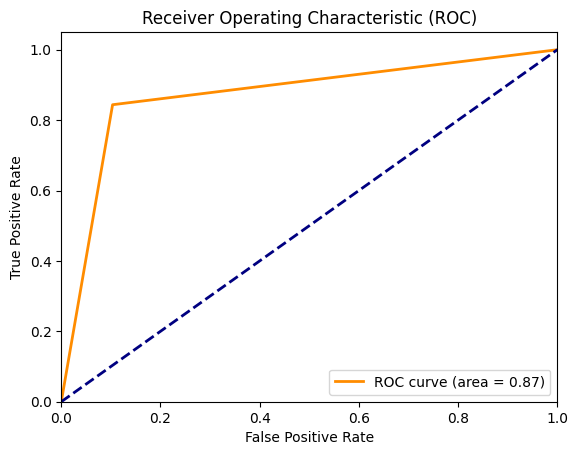

In [68]:
auc_curve_printing(y_test_20, y_pred)

In [69]:
ablation_study( SVC(kernel='linear',C=1, random_state=0) , X_train_80 , X_test_20 , y_train_80 , y_test_20)

age  :  0.639344262295082
sex  :  0.5573770491803278
cp  :  0.8360655737704918
trtbps  :  0.5245901639344263
chol  :  0.5245901639344263
fbs  :  0.5245901639344263
restecg  :  0.5245901639344263
thalachh  :  0.7213114754098361
exng  :  0.7049180327868853
oldpeak  :  0.6885245901639344
slp  :  0.7213114754098361
caa  :  0.7213114754098361
thall  :  0.7868852459016393

Column With highest Accuracy is  cp


#### 70 - 30 Split 

In [70]:

svm = SVC()
param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf','sigmoid']}
#dict of various parameter we are gonna test and their values to test
grid = GridSearchCV(svm,param_grid)


In [71]:
grid.fit(scaled_X_train_70,y_train_70)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [72]:
grid.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [73]:
svm_classifier = SVC(kernel='linear',C=1, random_state=0)
svm_classifier.fit(scaled_X_train_70, y_train_70)

SVC(C=1, kernel='linear', random_state=0)

#### Predicting the results

In [74]:
df = svm_classifier.decision_function(scaled_X_test_30) 
preds =[] 
for i in df: 
    if i<0.6: 
        preds.append(0) 
    else: 
        preds.append(1)

Confusion Matrix:


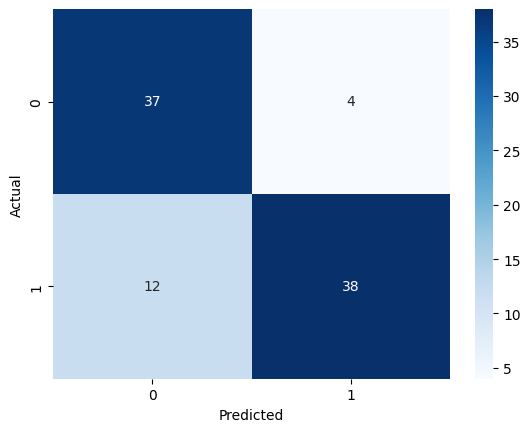


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        41
           1       0.90      0.76      0.83        50

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.84      0.82      0.82        91



In [75]:
print_confusion_matrix(y_test_30, preds)

ROC AUC Score: 0.831219512195122


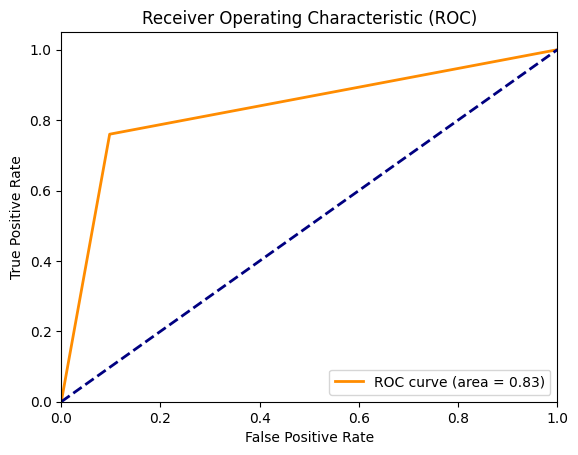

In [76]:
auc_curve_printing(y_test_30, preds)

# Comparing the Models 

#### F1 Scores

In [77]:
print("F1-Scores of each Classifier are : \n")

for val in F1Scores:
    print(val ,"  : " ,F1Scores[val])

print ( "\nThe Classifiers with best F1 Score is\n", max(F1Scores, key=F1Scores.get))
print ("\nF1-Score of" , max(F1Scores, key=F1Scores.get) , "is :" , F1Scores[max(F1Scores, key=F1Scores.get)])

F1-Scores of each Classifier are : 

Logistic_Regression   :  0.8525384035247887
KNN_Classifier   :  0.9016922263352722
LDA_Classifier   :  0.8525384035247887
Naive_Bayes_Classifier   :  0.8689229684470298
SVM_Classifier   :  0.8689229684470298

The Classifiers with best F1 Score is
 KNN_Classifier

F1-Score of KNN_Classifier is : 0.9016922263352722


#### Recall

In [78]:
print("Recall of each Classifier are : \n")

for val in Recall_Of_Model:
    print(val ,"  : " ,Recall_Of_Model[val])

print ( "\nThe Classifiers with best Recall is\n", max(Recall_Of_Model, key=Recall_Of_Model.get))
print ("\nRecall of" , max(Recall_Of_Model, key=Recall_Of_Model.get) , "is :" , Recall_Of_Model[max(Recall_Of_Model, key=Recall_Of_Model.get)])

Recall of each Classifier are : 

Logistic_Regression   :  0.84375
KNN_Classifier   :  0.875
LDA_Classifier   :  0.84375
Naive_Bayes_Classifier   :  0.84375
SVM_Classifier   :  0.84375

The Classifiers with best Recall is
 KNN_Classifier

Recall of KNN_Classifier is : 0.875


#### Precision Scores 

In [79]:
print("Precision of each Classifier are : \n")

for val in Precision_Of_Model:
    print(val ,"  : " ,Precision_Of_Model[val])

print ( "\nThe Classifiers with best Precision is\n", max(Precision_Of_Model, key=Precision_Of_Model.get))
print ("\nPrecision of" , max(Precision_Of_Model, key=Precision_Of_Model.get) , "is :" , Precision_Of_Model[max(Precision_Of_Model, key=Precision_Of_Model.get)])

Precision of each Classifier are : 

Logistic_Regression   :  0.8709677419354839
KNN_Classifier   :  0.9333333333333333
LDA_Classifier   :  0.8709677419354839
Naive_Bayes_Classifier   :  0.9
SVM_Classifier   :  0.9

The Classifiers with best Precision is
 KNN_Classifier

Precision of KNN_Classifier is : 0.9333333333333333


#### Accuracy

In [80]:
print("Accuracy of each Classifier are : \n")

for val in Accuracy_Of_Model:
    print(val ,"  : " ,Accuracy_Of_Model[val])

print ( "\nThe Classifiers with best Accuracy is\n", max(Accuracy_Of_Model, key=Accuracy_Of_Model.get))
print ("\nAccuracy of" , max(Accuracy_Of_Model, key=Accuracy_Of_Model.get) , "is :" , Accuracy_Of_Model[max(Accuracy_Of_Model, key=Accuracy_Of_Model.get)])

Accuracy of each Classifier are : 

Logistic_Regression   :  0.8524590163934426
KNN_Classifier   :  0.9016393442622951
LDA_Classifier   :  0.8524590163934426
Naive_Bayes_Classifier   :  0.8688524590163934
SVM_Classifier   :  0.8688524590163934

The Classifiers with best Accuracy is
 KNN_Classifier

Accuracy of KNN_Classifier is : 0.9016393442622951


## COMPARISON BY PLOTS

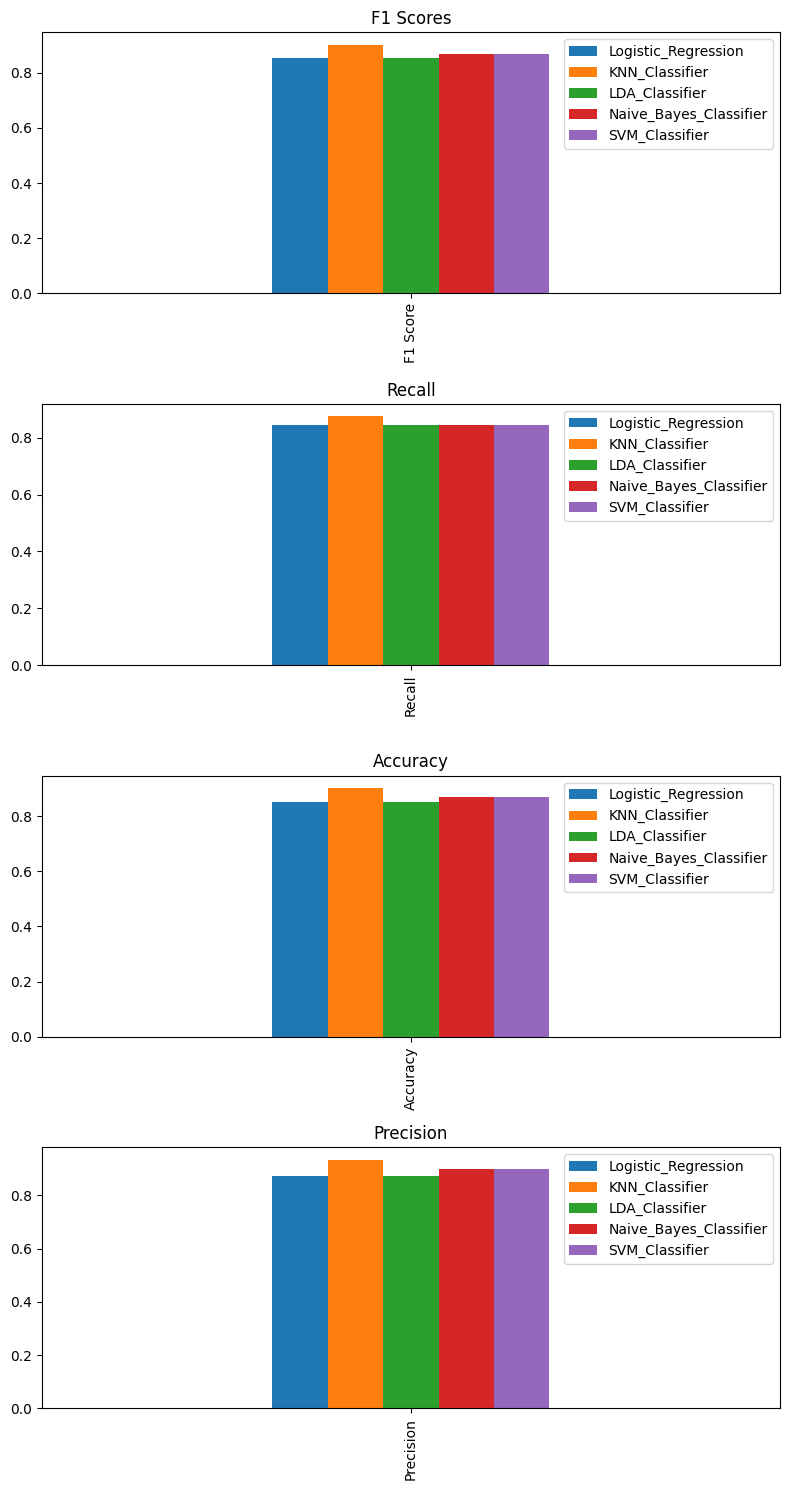

In [81]:
import matplotlib.pyplot as plt
import pandas as pd


df_f1_scores = pd.DataFrame(F1Scores, index=['F1 Score'])
df_recall = pd.DataFrame(Recall_Of_Model, index=['Recall'])
df_accuracy = pd.DataFrame(Accuracy_Of_Model, index=['Accuracy'])
df_precision = pd.DataFrame(Precision_Of_Model, index=['Precision'])

# Plotting individual bar plots
fig, axs = plt.subplots(4, figsize=(8, 15))

# Plot for F1 Scores
df_f1_scores.plot(kind='bar', ax=axs[0], legend=True, width=0.3)
axs[0].set_title('F1 Scores')
axs[0].legend(loc='upper right')

# Plot for Recall
df_recall.plot(kind='bar', ax=axs[1], legend=True, width=0.3)
axs[1].set_title('Recall')
axs[1].legend(loc='upper right')

# Plot for Accuracy
df_accuracy.plot(kind='bar', ax=axs[2], legend=True, width=0.3)
axs[2].set_title('Accuracy')
axs[2].legend(loc='upper right')

# Plot for Precision
df_precision.plot(kind='bar', ax=axs[3], legend=True, width=0.3)
axs[3].set_title('Precision')
axs[3].legend(loc='upper right')

plt.subplots_adjust(hspace=0.5)  # Adjusting space between subplots
plt.tight_layout()

# Display the plot
plt.show()


## Comaparison Table

In [82]:
# Create a DataFrame from dictionaries
df = pd.DataFrame([F1Scores, Recall_Of_Model, Accuracy_Of_Model, Precision_Of_Model],
                  index=['F1Scores', 'Recall', 'Accuracy', 'Precision'])

print(df)

           Logistic_Regression  KNN_Classifier  LDA_Classifier  \
F1Scores              0.852538        0.901692        0.852538   
Recall                0.843750        0.875000        0.843750   
Accuracy              0.852459        0.901639        0.852459   
Precision             0.870968        0.933333        0.870968   

           Naive_Bayes_Classifier  SVM_Classifier  
F1Scores                 0.868923        0.868923  
Recall                   0.843750        0.843750  
Accuracy                 0.868852        0.868852  
Precision                0.900000        0.900000  
